C:\Users\user\AppData\Local\Temp\ipykernel_15700\2056852806.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15700\2056852806.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15700\2056852806.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15700\2056852806.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f

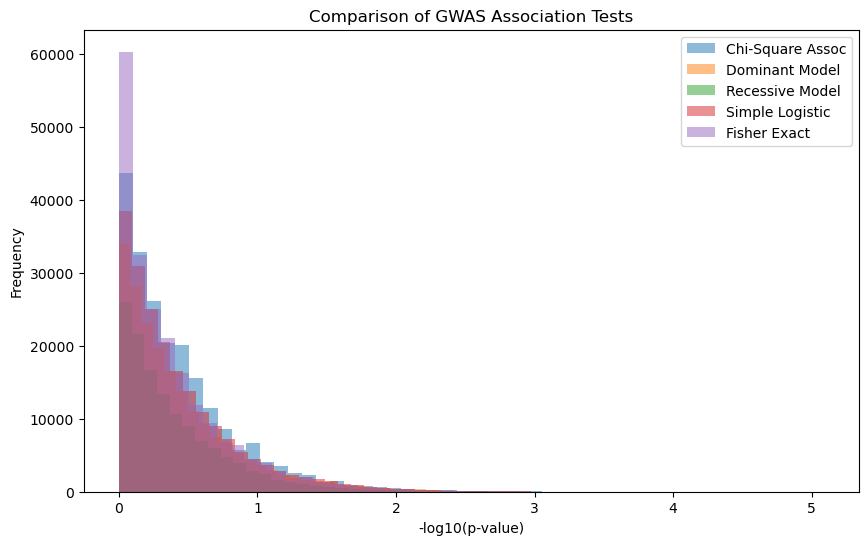

Merged results saved to C:/Users/user/Desktop/Programming/Python/gwas/merged_gwas_results.csv


In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define file paths
files = {
    "Chi-Square Assoc": "C:/Users/user/Desktop/Programming/Python/gwas/assoc_results.assoc",
    "Dominant Model": "C:/Users/user/Desktop/Programming/Python/gwas/dominant_results.assoc.logistic",
    "Recessive Model": "C:/Users/user/Desktop/Programming/Python/gwas/recessive_results.assoc.logistic",
    "Simple Logistic": "C:/Users/user/Desktop/Programming/Python/gwas/simple_logistic.assoc.logistic",
    "Fisher Exact": "C:/Users/user/Desktop/Programming/Python/gwas/fisher.assoc.fisher",
}

# Define required columns for merging
columns = {"SNP", "CHR", "BP", "P"}

# Read all files into a dictionary
results = {}
for test, file in files.items():
    try:
        df = pd.read_csv(file, delim_whitespace=True)
        df = df[[col for col in columns if col in df.columns]]  # Keep only necessary columns
        df.rename(columns={"P": test}, inplace=True)  # Rename p-value column to test name
        results[test] = df
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Merge results on SNPs
merged_df = list(results.values())[0]
for test, df in list(results.items())[1:]:
    merged_df = pd.merge(merged_df, df, on=["SNP", "CHR", "BP"], how="outer")

# Convert p-values to -log10(p) for easier comparison
for test in files.keys():
    merged_df[test] = -merged_df[test].apply(lambda x: np.log10(x) if pd.notnull(x) and x > 0 else None)

# Plot p-value distributions for each test
plt.figure(figsize=(10, 6))
for test in files.keys():
    plt.hist(merged_df[test].dropna(), bins=50, alpha=0.5, label=test)
plt.xlabel("-log10(p-value)")
plt.ylabel("Frequency")
plt.title("Comparison of GWAS Association Tests")
plt.legend()
plt.show()

# Save the merged results
merged_df.to_csv("C:/Users/user/Desktop/Programming/Python/gwas/merged_gwas_results.csv", index=False)
print("Merged results saved to C:/Users/user/Desktop/Programming/Python/gwas/merged_gwas_results.csv")


In [19]:

# Load the merged results file
merged_df = pd.read_csv("C:/Users/user/Desktop/Programming/Python/gwas/merged_gwas_results.csv")

# Set significance threshold
significant_threshold = 5e-8

# Find significant SNPs in each test
significant_snps = {}
for column in merged_df.columns[1:]:  # Skip SNP column
    significant_snps[column] = merged_df[merged_df[column] < significant_threshold]["SNP"].tolist()

# Find common SNPs
common_snps = set(significant_snps["Simple Logistic"]).intersection(
    significant_snps["Dominant Model"], significant_snps["Recessive Model"],
    significant_snps["Chi-Square Assoc"], significant_snps["Fisher Exact"]
)

print("Common Significant SNPs Across Tests:", common_snps)


Common Significant SNPs Across Tests: set()


In [89]:
# Re-import necessary libraries after execution state reset
import pandas as pd

# Define file path
model_file = "C:/Users/user/Desktop/Programming/Python/gwas/model.model"

# Load PLINK model association results
try:
    model_df = pd.read_csv(model_file, delim_whitespace=True)
except Exception as e:
    model_df = None
    print(f"Error reading the file: {e}")
model_df.head()
sign_snps = model_df[model_df["P"] < 0.0005]
sign_snps.head()
sign_snps.shape

C:\Users\user\AppData\Local\Temp\ipykernel_15700\3197571946.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  model_df = pd.read_csv(model_file, delim_whitespace=True)


(225, 10)

In [104]:
import myvariant
import pandas as pd

# Initialize MyVariant API
mv = myvariant.MyVariantInfo()

# Extract unique SNPs from significant SNPs DataFrame
snp_list = sign_snps["SNP"].dropna().unique().tolist()

# Function to annotate SNP to gene symbol
def annotate_snp(snp_id):
    try:
        res = mv.query(snp_id, fields="dbsnp.gene.symbol")
        gene_symbol = res["hits"][0]["dbsnp"]["gene"]["symbol"] if res["hits"] else "NA"
        return gene_symbol
    except:
        return "NA"

# Annotate SNPs
snp_annotations = {snp: annotate_snp(snp) for snp in snp_list}

# Convert to DataFrame
annotated_df = pd.DataFrame(list(snp_annotations.items()), columns=["SNP", "Gene"])

# Merge with sign_snps DataFrame
sign_snps_annotated = sign_snps.merge(annotated_df, on="SNP", how="left")




Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
Input sequen

In [118]:
sign_snps_annotated

,CHR,SNP,A1,A2,TEST,AFF,UNAFF,CHISQ,DF,P,Gene
0,1,rs2279703,C,T,REC,11/82,26/50,12.25,1.0,0.000465,MORN1
1,1,rs241501,T,G,TREND,30/156,50/102,13.67,1.0,0.000218,AGBL4
2,1,rs241501,T,G,ALLELIC,30/156,50/102,13.01,1.0,0.000309,AGBL4
3,1,rs1766377,C,T,TREND,29/157,51/101,15.17,1.0,0.000098,NA
4,1,rs1766377,C,T,ALLELIC,29/157,51/101,14.94,1.0,0.000111,NA
...,...,...,...,...,...,...,...,...,...,...,...
220,21,rs7279626,A,G,REC,26/67,5/71,12.76,1.0,0.000354,NA
221,21,rs7278004,C,T,REC,27/66,5/71,13.74,1.0,0.000210,ICOSLG
222,22,rs133903,C,A,TREND,52/134,71/79,13.27,1.0,0.000270,MYO18B
223,22,rs133903,C,A,ALLELIC,52/134,71/79,13.43,1.0,0.000247,MYO18B


In [93]:
sign_snps_annotated.head()

,CHR,SNP,A1,A2,TEST,AFF,UNAFF,CHISQ,DF,P,Gene
0,1,rs2279703,C,T,REC,11/82,26/50,12.25,1.0,0.000465,MORN1
1,1,rs241501,T,G,TREND,30/156,50/102,13.67,1.0,0.000218,AGBL4
2,1,rs241501,T,G,ALLELIC,30/156,50/102,13.01,1.0,0.000309,AGBL4
3,1,rs1766377,C,T,TREND,29/157,51/101,15.17,1.0,0.000098,NA
4,1,rs1766377,C,T,ALLELIC,29/157,51/101,14.94,1.0,0.000111,NA


In [108]:
sign_snps_annotated[sign_snps_annotated["Gene"] != "NA"]

,CHR,SNP,A1,A2,TEST,AFF,UNAFF,CHISQ,DF,P,Gene
0,1,rs2279703,C,T,REC,11/82,26/50,12.25,1.0,0.000465,MORN1
1,1,rs241501,T,G,TREND,30/156,50/102,13.67,1.0,0.000218,AGBL4
2,1,rs241501,T,G,ALLELIC,30/156,50/102,13.01,1.0,0.000309,AGBL4
5,1,rs4078484,T,C,TREND,28/158,46/106,12.20,1.0,0.000477,ELAVL4
6,1,rs618546,C,G,DOM,74/19,41/35,12.63,1.0,0.000380,LEXM
...,...,...,...,...,...,...,...,...,...,...,...
190,20,rs6138482,T,C,DOM,56/37,65/11,13.18,1.0,0.000284,VSX1
221,21,rs7278004,C,T,REC,27/66,5/71,13.74,1.0,0.000210,ICOSLG
222,22,rs133903,C,A,TREND,52/134,71/79,13.27,1.0,0.000270,MYO18B
223,22,rs133903,C,A,ALLELIC,52/134,71/79,13.43,1.0,0.000247,MYO18B


In [124]:
sign_snps_annotated.to_csv("gwas_alz_sign_snps.csv")

In [120]:
significant_snps


,CHR,SNP,A1,A2,TEST,AFF,UNAFF,CHISQ,DF,P
244,1,rs2279703,C,T,REC,11/82,26/50,12.25,1.0,0.000465
18681,1,rs241501,T,G,TREND,30/156,50/102,13.67,1.0,0.000218
18682,1,rs241501,T,G,ALLELIC,30/156,50/102,13.01,1.0,0.000309
18696,1,rs1766377,C,T,TREND,29/157,51/101,15.17,1.0,0.000098
18697,1,rs1766377,C,T,ALLELIC,29/157,51/101,14.94,1.0,0.000111
...,...,...,...,...,...,...,...,...,...,...
1029949,21,rs7279626,A,G,REC,26/67,5/71,12.76,1.0,0.000354
1029959,21,rs7278004,C,T,REC,27/66,5/71,13.74,1.0,0.000210
1033931,22,rs133903,C,A,TREND,52/134,71/79,13.27,1.0,0.000270
1033932,22,rs133903,C,A,ALLELIC,52/134,71/79,13.43,1.0,0.000247


,CHR,SNP,A1,A2,TEST,AFF,UNAFF,CHISQ,DF,P,Gene_Location
0,1,rs2279703,C,T,REC,11/82,26/50,12.25,1.0,0.000465,1:2375256-2375256
1,1,rs241501,T,G,TREND,30/156,50/102,13.67,1.0,0.000218,1:49299766-49299766
2,1,rs241501,T,G,ALLELIC,30/156,50/102,13.01,1.0,0.000309,1:49299766-49299766
3,1,rs1766377,C,T,TREND,29/157,51/101,15.17,1.0,0.000098,1:49451412-49451412
4,1,rs1766377,C,T,ALLELIC,29/157,51/101,14.94,1.0,0.000111,1:49451412-49451412
...,...,...,...,...,...,...,...,...,...,...,...
220,21,rs7279626,A,G,REC,26/67,5/71,12.76,1.0,0.000354,21:44215733-44215733
221,21,rs7278004,C,T,REC,27/66,5/71,13.74,1.0,0.000210,21:44216998-44216998
222,22,rs133903,C,A,TREND,52/134,71/79,13.27,1.0,0.000270,22:25770044-25770044
223,22,rs133903,C,A,ALLELIC,52/134,71/79,13.43,1.0,0.000247,22:25770044-25770044
